<a href="https://colab.research.google.com/github/abd766/SAMARITANS/blob/main/Readmission_Heart_Patients_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installations

In [1]:
!pip install imbalanced-learn

In [2]:
! pip install xgboost

## Include Libraries

In [3]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import imblearn
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

import statistics

In [4]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

## Read Files

In [6]:
# Test Files
test_data = pd.read_excel(r"/content/Testing Data.xlsx")
test_data.shape

(2121, 57)

In [7]:
# Train Files
train_data = pd.read_excel(r"/content/Training Data.xlsx")
train_data.shape

(8481, 58)

In [8]:
features = pd.read_excel(r"/content/Feature Description.xlsx")
features.shape

(59, 3)

														Training Data

## Analysis

In [9]:
train_data

,PatientId,EncounterId,DischargeDisposision,Gender,Race,DiabetesMellitus,ChronicKidneyDisease,Anemia,Depression,ChronicObstructivePulmonaryDisease,...,Diuretics,TotalMedicine,CardiacTroponin,Hemoglobin,SerumSodium,SerumCreatinine,BNP,NT-proBNP,ReadmissionDays,ReadmissionWithin_90Days
0,4200412,199171333,Home,Male,White,DM,NaN,Anemia,NaN,COPD,...,0,0,0.0,0.00,0.0,0.000000,0.0,0.0,5.0,Yes
1,4055894,26704337,Home,Male,White,DM,CKD,Anemia,Depression,COPD,...,5,8,0.0,0.00,0.0,1.540000,0.0,0.0,NaN,No
2,4867407,60388216,Home,Male,White,DM,CKD,Anemia,NaN,COPD,...,1,2,0.0,10.20,0.0,0.000000,0.0,0.0,NaN,No
3,4058064,274642265,Hospice - Home,Female,White,DM,NaN,Anemia,NaN,COPD,...,0,0,0.0,0.00,132.0,0.000000,0.0,0.0,NaN,No
4,4150623,70000001557327,SNF,Female,White,NaN,NaN,Anemia,NaN,COPD,...,0,0,0.0,7.26,0.0,0.000000,0.0,0.0,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8476,4152524,40004415567,Home Health,Female,White,DM,CKD,Anemia,NaN,COPD,...,3,6,0.0,0.00,0.0,1.076667,0.0,0.0,3.0,Yes
8477,4042227,14347947026,SNF,Male,White,DM,CKD,NaN,Depression,COPD,...,0,0,0.0,0.00,0.0,0.000000,0.0,0.0,2.0,Yes
8478,4603405,67117733,Hospice,Female,White,NaN,NaN,NaN,NaN,NaN,...,0,1,0.0,0.00,0.0,0.000000,0.0,0.0,NaN,No
8479,4033677,68564389,Home,Female,White,DM,CKD,NaN,Depression,NaN,...,1,5,0.0,0.00,0.0,1.690000,0.0,0.0,68.0,Yes


In [10]:
# Null values percentages
null_percent = train_data.isnull().sum()/train_data.shape[0]*100
null_percent

,0
PatientId,0.000000
EncounterId,0.000000
DischargeDisposision,0.000000
Gender,0.000000
Race,1.096569
DiabetesMellitus,45.478128
ChronicKidneyDisease,46.055890
Anemia,35.396769
Depression,60.228747
ChronicObstructivePulmonaryDisease,46.621861


## Visualization

<Axes: >

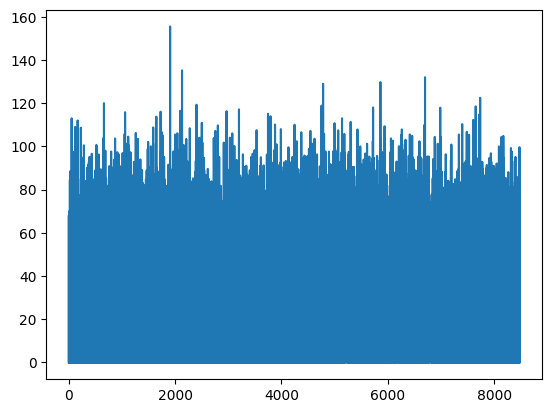

In [11]:
train_data['HeartRateMean'].plot()

Text(0.5, 1.0, 'BP Relation')

<Figure size 500x500 with 0 Axes>

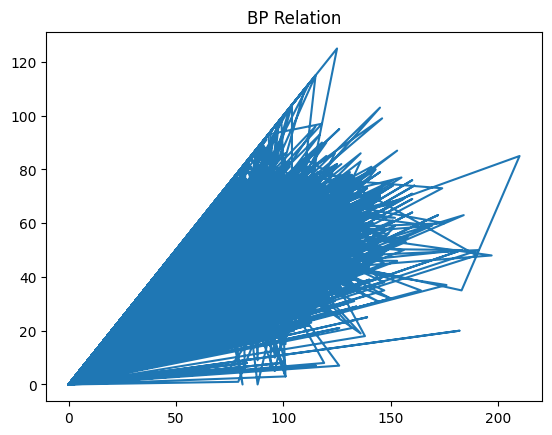

In [12]:
plt.figure(figsize=(5,5))
x = train_data['BPDiastolicMax']
y = train_data['BPDiastolicMin']

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('BP Relation')

Text(0.5, 1.0, 'heart Relation with intake of medicines')

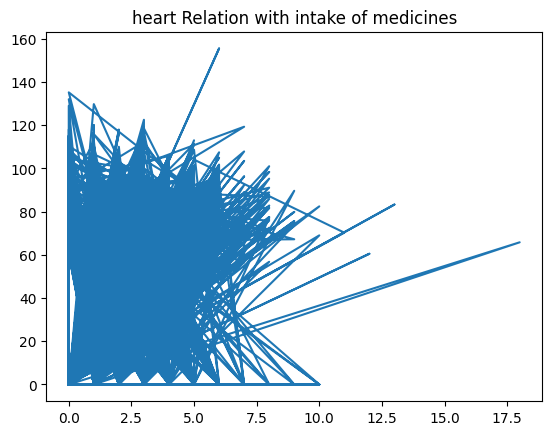

In [13]:
x = train_data['TotalMedicine']
y = train_data['HeartRateMean']

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('heart Relation with intake of medicines')

Text(0.5, 1.0, 'Age Relation with changes in Haemoglobin Levels')

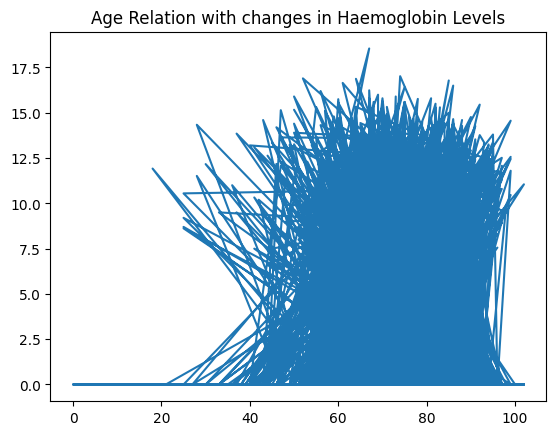

In [14]:
x = train_data['Age']
y = train_data['Hemoglobin']

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Age Relation with changes in Haemoglobin Levels')

## Pre-Processing

In [15]:
# fill nans
train_data['DiabetesMellitus'].fillna('0',inplace=True)
train_data['ChronicKidneyDisease'].fillna('0',inplace=True)
train_data['Anemia'].fillna('0',inplace=True)
train_data['Depression '].fillna('0',inplace=True)
train_data['ChronicObstructivePulmonaryDisease'].fillna('0',inplace=True)

In [16]:
# drop unecessary columns
train_data.drop('Race',inplace=True,axis=1)
train_data.drop('PatientId',inplace=True,axis=1)
train_data.drop('EncounterId',inplace=True,axis=1)
train_data.drop('ReadmissionDays',inplace=True,axis=1)

In [17]:
# columns with majority data zero
count = 0

for i in train_data.columns:
    count = (train_data[i] == 0).sum()

    if count > 7000:
        print(i, count)

ACEInhibitors 7389
ARBs 7657
CardiacTroponin 7574
Hemoglobin 7437
SerumSodium 7179
BNP 8459
NT-proBNP 8466


In [18]:
# Droping columns with major data as zero
train_data.drop('ACEInhibitors', inplace=True,axis=1)
train_data.drop('ARBs', inplace=True,axis=1)
train_data.drop('CardiacTroponin', inplace=True,axis=1)
train_data.drop('Hemoglobin', inplace=True,axis=1)
train_data.drop('SerumSodium', inplace=True,axis=1)
train_data.drop('BNP', inplace=True,axis=1)
train_data.drop('NT-proBNP', inplace=True,axis=1)

In [19]:
train_data

,DischargeDisposision,Gender,DiabetesMellitus,ChronicKidneyDisease,Anemia,Depression,ChronicObstructivePulmonaryDisease,Age,ChronicDiseaseCount,LengthOfStay,...,PulseRateMean,RespiratoryRateMin,RespiratoryRateMax,RespiratoryRateMedian,RespiratoryRateMean,BetaBlockers,Diuretics,TotalMedicine,SerumCreatinine,ReadmissionWithin_90Days
0,Home,Male,DM,0,Anemia,0,COPD,58,18,3,...,0.000000,0,0,0.0,0.000000,0,0,0,0.000000,Yes
1,Home,Male,DM,CKD,Anemia,Depression,COPD,80,24,6,...,0.000000,14,22,17.5,17.833333,1,5,8,1.540000,No
2,Home,Male,DM,CKD,Anemia,0,COPD,63,11,8,...,0.000000,0,0,0.0,0.000000,1,1,2,0.000000,No
3,Hospice - Home,Female,DM,0,Anemia,0,COPD,73,8,4,...,0.000000,22,22,22.0,22.000000,0,0,0,0.000000,No
4,SNF,Female,0,0,Anemia,0,COPD,85,20,3,...,91.476190,14,20,17.0,17.000000,0,0,0,0.000000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8476,Home Health,Female,DM,CKD,Anemia,0,COPD,59,14,21,...,0.000000,9,107,26.0,32.885714,2,3,6,1.076667,Yes
8477,SNF,Male,DM,CKD,0,Depression,COPD,86,13,19,...,0.000000,0,0,0.0,0.000000,0,0,0,0.000000,Yes
8478,Hospice,Female,0,0,0,0,0,94,2,12,...,111.863636,1,22,16.0,14.904762,1,0,1,0.000000,No
8479,Home,Female,DM,CKD,0,Depression,0,77,19,3,...,79.666667,16,18,17.0,16.875000,1,1,5,1.690000,Yes


													Testing Data

In [20]:
# Droping Least Significant Cells
test_data.drop('ACEInhibitors', inplace=True,axis=1)
test_data.drop('ARBs', inplace=True,axis=1)
test_data.drop('CardiacTroponin', inplace=True,axis=1)
test_data.drop('Hemoglobin', inplace=True,axis=1)
test_data.drop('SerumSodium', inplace=True,axis=1)
test_data.drop('BNP', inplace=True,axis=1)
test_data.drop('NT-proBNP', inplace=True,axis=1)
test_data.drop('Race',inplace=True,axis=1)
test_data.drop('PatientId',inplace=True,axis=1)
test_data.drop('EncounterId',inplace=True,axis=1)

In [21]:
# filling nans
test_data['DiabetesMellitus'].fillna('0',inplace=True)
test_data['ChronicKidneyDisease'].fillna('0',inplace=True)
test_data['Anemia'].fillna('0',inplace=True)
test_data['Depression '].fillna('0',inplace=True)
test_data['ChronicObstructivePulmonaryDisease'].fillna('0',inplace=True)

In [22]:
test_data

,DischargeDisposision,Gender,DiabetesMellitus,ChronicKidneyDisease,Anemia,Depression,ChronicObstructivePulmonaryDisease,Age,ChronicDiseaseCount,LengthOfStay,...,PulseRateMean,RespiratoryRateMin,RespiratoryRateMax,RespiratoryRateMedian,RespiratoryRateMean,BetaBlockers,Diuretics,TotalMedicine,SerumCreatinine,PredictedReadmissionWithin_90Days
0,Home,Female,0,0,0,0,COPD,66,6,3,...,65.833333,12,20,17.0,16.421053,0,0,1,0.00,0
1,Home,Female,DM,CKD,Anemia,Depression,0,86,21,1,...,0.000000,0,0,0.0,0.000000,0,0,0,0.00,1
2,Home,Male,DM,0,Anemia,0,0,84,11,1,...,0.000000,0,0,0.0,0.000000,0,0,0,0.00,0
3,IRF,Male,DM,CKD,Anemia,Depression,COPD,77,21,12,...,0.000000,0,0,0.0,0.000000,0,0,0,0.00,1
4,Home Health,Female,DM,0,0,0,COPD,74,11,8,...,73.000000,10,40,18.0,20.720000,1,3,4,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,Expired,Male,DM,0,0,0,COPD,77,17,25,...,0.000000,8,162,41.5,49.045455,1,2,4,1.38,0
2117,Home Health,Male,0,CKD,0,Depression,0,82,14,9,...,0.000000,0,0,0.0,0.000000,0,0,0,0.00,1
2118,ACH,Female,DM,0,0,0,COPD,67,17,6,...,0.000000,16,20,17.5,17.750000,1,2,3,1.04,1
2119,Home Health,Male,DM,CKD,Anemia,0,COPD,71,16,3,...,0.000000,16,20,18.0,18.000000,1,2,4,0.00,0


														Modeling

## Encoding

In [23]:
le = LabelEncoder()

# Training Data
categ = ['DischargeDisposision','Gender','DiabetesMellitus','ChronicKidneyDisease','Anemia','Depression ','ChronicObstructivePulmonaryDisease','ReadmissionWithin_90Days']
train_data[categ] = train_data[categ].apply(le.fit_transform)

# Test Data
category=  ['DischargeDisposision','Gender','DiabetesMellitus','ChronicKidneyDisease','Anemia','Depression ','ChronicObstructivePulmonaryDisease']
test_data[category] = test_data[category].apply(le.fit_transform)

## Train-Test Split

In [24]:
# Training Data
X_train = train_data.drop('ReadmissionWithin_90Days',axis=1)
y_train = train_data['ReadmissionWithin_90Days']

In [25]:
# Testing Data
X_test = test_data.drop('PredictedReadmissionWithin_90Days',axis=1)
y_test = test_data['PredictedReadmissionWithin_90Days']

## Scale & Balance

In [26]:
# Data Balancing
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train,y_train)

In [27]:
# Scaling
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

														Modeling

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

#### DecisionTreeClassifier

In [30]:
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train_sc, y_train)
pred = dtree.predict(X_test_sc)

print ("Accuracy : " , accuracy_score(y_test,pred)*100)

Accuracy :  61.85761433286186


In [31]:
# Results
print("Report : \n", classification_report(y_test, pred))
print("F1 Score : ",f1_score(y_test, pred, average='macro')*100)
print("Confusion Matrix :\n" , confusion_matrix(y_test,pred))

Report : 
               precision    recall  f1-score   support

           0       0.76      0.68      0.72      1497
           1       0.38      0.47      0.42       624

    accuracy                           0.62      2121
   macro avg       0.57      0.58      0.57      2121
weighted avg       0.64      0.62      0.63      2121

F1 Score :  56.82717044935608
Confusion Matrix :
 [[1018  479]
 [ 330  294]]


In [33]:
# decisiontree hyperparameter tuning
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtree, param_grid={'criterion': ['gini', 'entropy']},cv=10,scoring='accuracy')
grid.fit(X_train_sc,y_train)
pred = grid.predict(X_test_sc)

In [34]:
# Displaying
print ("Accuracy : " , accuracy_score(y_test,pred)*100)
print("Report : \n", classification_report(y_test, pred))
print("F1 Score : ",f1_score(y_test, pred, average='macro')*100)
print("Confusion Matrix :\n" , confusion_matrix(y_test,pred))

Accuracy :  63.97925506836398
Report : 
               precision    recall  f1-score   support

           0       0.77      0.69      0.73      1497
           1       0.41      0.51      0.45       624

    accuracy                           0.64      2121
   macro avg       0.59      0.60      0.59      2121
weighted avg       0.67      0.64      0.65      2121

F1 Score :  59.273047149894445
Confusion Matrix :
 [[1039  458]
 [ 306  318]]


#### Random Forest Classifier

In [37]:
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini")
rm.fit(X_train_sc, y_train)
pred = rm.predict(X_test_sc)

print ("Accuracy : " , accuracy_score(y_test,pred)*100)

Accuracy :  67.56247053276756


In [39]:
# Results
print("Report : \n", classification_report(y_test, pred))
print("F1 Score : ",f1_score(y_test, pred, average='macro')*100)
print("Confusion Matrix :\n" , confusion_matrix(y_test,pred))

Report : 
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      1497
           1       0.45      0.46      0.46       624

    accuracy                           0.68      2121
   macro avg       0.61      0.61      0.61      2121
weighted avg       0.68      0.68      0.68      2121

F1 Score :  61.30374921241718
Confusion Matrix :
 [[1143  354]
 [ 334  290]]


#### Logistic Regression

In [51]:
logit = LogisticRegression(fit_intercept=True, penalty='l2')
logit.fit(X_train_sc, y_train)
pred = logit.predict(X_test_sc)

print ("Accuracy : " , accuracy_score(y_test,pred)*100)

Accuracy :  69.02404526166902


In [40]:
# Results
print("Report : \n", classification_report(y_test, pred))
print("F1 Score : ",f1_score(y_test, pred, average='macro')*100)
print("Confusion Matrix :\n" , confusion_matrix(y_test,pred))

Report : 
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      1497
           1       0.45      0.46      0.46       624

    accuracy                           0.68      2121
   macro avg       0.61      0.61      0.61      2121
weighted avg       0.68      0.68      0.68      2121

F1 Score :  61.30374921241718
Confusion Matrix :
 [[1143  354]
 [ 334  290]]


#### XG Boost

In [41]:
clf4 = xgb.XGBClassifier()
clf4.fit(X_train_sc, y_train)
pred = clf4.predict(X_test_sc)

print ("Accuracy : " , accuracy_score(y_test,pred)*100)

Accuracy :  65.81801037246582


In [42]:
# Results
print("Report : \n", classification_report(y_test, pred))
print("F1 Score : ",f1_score(y_test, pred, average='macro')*100)
print("Confusion Matrix :\n" , confusion_matrix(y_test,pred))

Report : 
               precision    recall  f1-score   support

           0       0.79      0.71      0.75      1497
           1       0.43      0.54      0.48       624

    accuracy                           0.66      2121
   macro avg       0.61      0.62      0.61      2121
weighted avg       0.68      0.66      0.67      2121

F1 Score :  61.25326527336578
Confusion Matrix :
 [[1062  435]
 [ 290  334]]


#### Gradient Boosting

In [43]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
pred = clf.predict(X_test)

print ("Accuracy : " , accuracy_score(y_test,pred)*100)

Accuracy :  65.44082979726544


In [44]:
# Results
print("Report : \n", classification_report(y_test, pred))
print("F1 Score : ",f1_score(y_test, pred, average='macro')*100)
print("Confusion Matrix :\n" , confusion_matrix(y_test,pred))

Report : 
               precision    recall  f1-score   support

           0       0.81      0.67      0.73      1497
           1       0.44      0.62      0.51       624

    accuracy                           0.65      2121
   macro avg       0.62      0.64      0.62      2121
weighted avg       0.70      0.65      0.67      2121

F1 Score :  62.302220340598204
Confusion Matrix :
 [[1000  497]
 [ 236  388]]


#### MLP Classifier

In [45]:
mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train_sc, y_train)
pred = mlp.predict(X_test_sc)

print ("Accuracy : " , accuracy_score(y_test,pred)*100)

Accuracy :  66.85525695426685


In [46]:
# Results
print("Report : \n", classification_report(y_test, pred))
print("F1 Score : ",f1_score(y_test, pred, average='macro')*100)
print("Confusion Matrix :\n" , confusion_matrix(y_test,pred))

Report : 
               precision    recall  f1-score   support

           0       0.80      0.71      0.75      1497
           1       0.45      0.56      0.50       624

    accuracy                           0.67      2121
   macro avg       0.62      0.64      0.63      2121
weighted avg       0.69      0.67      0.68      2121

F1 Score :  62.59235797425229
Confusion Matrix :
 [[1067  430]
 [ 273  351]]


#### SVC Model

In [47]:
svc = SVC(kernel='linear')
svc.fit(X_train_sc,y_train)
pred = svc.predict(X_test_sc)

print ("Accuracy : " , accuracy_score(y_test,pred)*100)

Accuracy :  70.81565299387081


In [48]:
# Results
print("Report : \n", classification_report(y_test, pred))
print("F1 Score : ",f1_score(y_test, pred, average='macro')*100)
print("Confusion Matrix :\n" , confusion_matrix(y_test,pred))

Report : 
               precision    recall  f1-score   support

           0       0.77      0.84      0.80      1497
           1       0.51      0.40      0.44       624

    accuracy                           0.71      2121
   macro avg       0.64      0.62      0.62      2121
weighted avg       0.69      0.71      0.70      2121

F1 Score :  62.30093404969941
Confusion Matrix :
 [[1255  242]
 [ 377  247]]


## Hard Voting

In [56]:
def hardVoting():

    counter = 0
    highest_accuracy = 0

    while(True):

        hv = VotingClassifier(estimators=[('rf',rm), ('xgb',clf4), ('lr',logit)], voting='hard', weights=(2,0,2))
        hv.fit(X_train_sc, y_train)
        pred = hv.predict(X_test_sc)

        accuracy = accuracy_score(y_test, pred) * 100
        print (str(counter) + " Accuracy : " , accuracy)

        if accuracy > highest_accuracy:

            highest_accuracy = accuracy
            predictions = pd.DataFrame(pred)

        if (accuracy > 75) or (counter > 40):

            print("\n\n\t\t\tLimit Reached")
            predictions.to_csv("Predictions.csv", index=False)

            print("Highest Accuracy : ", highest_accuracy)
            break

        counter += 1

In [57]:
hardVoting()

0 Accuracy :  72.32437529467232
1 Accuracy :  72.65440829797265
2 Accuracy :  72.60726072607261
3 Accuracy :  72.23008015087224
4 Accuracy :  71.8057520037718
5 Accuracy :  72.41867043847242
6 Accuracy :  71.19283356907118
7 Accuracy :  71.9000471475719
8 Accuracy :  72.56011315417256
9 Accuracy :  71.9000471475719
10 Accuracy :  71.94719471947195
11 Accuracy :  71.9000471475719
12 Accuracy :  72.13578500707214
13 Accuracy :  72.32437529467232
14 Accuracy :  72.60726072607261
15 Accuracy :  72.51296558227251
16 Accuracy :  71.8057520037718
17 Accuracy :  71.94719471947195
18 Accuracy :  71.8057520037718
19 Accuracy :  71.14568599717114
20 Accuracy :  72.27722772277228
21 Accuracy :  71.9000471475719
22 Accuracy :  71.57001414427157
23 Accuracy :  72.32437529467232
24 Accuracy :  72.08863743517209
25 Accuracy :  72.23008015087224
26 Accuracy :  71.57001414427157
27 Accuracy :  72.56011315417256
28 Accuracy :  72.04148986327205
29 Accuracy :  71.75860443187176
30 Accuracy :  71.758604431